<a href="https://colab.research.google.com/github/jsbrittain/dengue-hackathon-25/blob/main/Dec_9_Covariate_analysis_against_incidence_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

#This script extracts the covariate data from the specific area and then measures the kendall tau correlation and sorts data selecting the covariates
#that show the highest correlations

In [ ]:
import pandas as pd
import xarray as xr
import seaborn as sns
# from tqdm import tqdm
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import r2_score
import os

import matplotlib.pyplot as plt


In [7]:
#Name is to state the covariate data to extract from

name="DOM"
data=pd.read_csv("Covariates_data_%s.csv"%name)
data.columns.values

array(['Unnamed: 0', 'time', 'region', 'spa01', 'spe01', 'spa03', 'spe03',
       'spa06', 'spe06', 'spa12', 'spe12', 't2m', 'rh', 'tp', 'index_x',
       't2m_L1.0', 't2m_L2.0', 't2m_L3.0', 't2m_L4.0', 't2m_L5.0',
       't2m_L6.0', 'rh_L1.0', 'rh_L2.0', 'rh_L3.0', 'rh_L4.0', 'rh_L5.0',
       'rh_L6.0', 'tp_L1.0', 'tp_L2.0', 'tp_L3.0', 'tp_L4.0', 'tp_L5.0',
       'tp_L6.0', 'mx2t24_L1.0', 'mx2t24_L2.0', 'mx2t24_L3.0',
       'mx2t24_L4.0', 'mx2t24_L5.0', 'mx2t24_L6.0', 'mn2t24_L1.0',
       'mn2t24_L2.0', 'mn2t24_L3.0', 'mn2t24_L4.0', 'mn2t24_L5.0',
       'mn2t24_L6.0', 'ssta', 'pop_count', 'area', 'pop_density',
       'index_y', 'Country', 'Region', 'Cases', 'Spatial_Resolution'],
      dtype=object)

array(['Unnamed: 0', 'time', 'region', 'spa01', 'spe01', 'spa03', 'spe03',
       'spa06', 'spe06', 'spa12', 'spe12', 't2m', 'rh', 'tp', 't2m_L1.0',
       't2m_L2.0', 't2m_L3.0', 't2m_L4.0', 't2m_L5.0', 't2m_L6.0',
       'rh_L1.0', 'rh_L2.0', 'rh_L3.0', 'rh_L4.0', 'rh_L5.0', 'rh_L6.0',
       'tp_L1.0', 'tp_L2.0', 'tp_L3.0', 'tp_L4.0', 'tp_L5.0', 'tp_L6.0',
       'mx2t24_L1.0', 'mx2t24_L2.0', 'mx2t24_L3.0', 'mx2t24_L4.0',
       'mx2t24_L5.0', 'mx2t24_L6.0', 'mn2t24_L1.0', 'mn2t24_L2.0',
       'mn2t24_L3.0', 'mn2t24_L4.0', 'mn2t24_L5.0', 'mn2t24_L6.0', 'ssta',
       'pop_count', 'pop_density', 'Cases'], dtype=object)

In [41]:
variables=['spa01', 'spe01', 'spa03', 'spe03',
       'spa06', 'spe06', 'spa12', 'spe12', 'tp','t2m', 'rh',
       't2m_L1.0', 't2m_L2.0', 't2m_L3.0', 't2m_L4.0', 't2m_L5.0',
       't2m_L6.0','rh_L1.0', 'rh_L2.0', 'rh_L3.0', 'rh_L4.0', 'rh_L5.0',
       'rh_L6.0', 'tp_L1.0', 'tp_L2.0', 'tp_L3.0', 'tp_L4.0', 'tp_L5.0',
       'tp_L6.0','mx2t24_L1.0', 'mx2t24_L2.0', 'mx2t24_L3.0',
       'mx2t24_L4.0', 'mx2t24_L5.0', 'mx2t24_L6.0', 'mn2t24_L1.0',
       'mn2t24_L2.0', 'mn2t24_L3.0', 'mn2t24_L4.0', 'mn2t24_L5.0',
       'mn2t24_L6.0', 'ssta',"Cases",'pop_count', 'pop_density',
       ]#Dropping variables not useful for analysis (such as admin level)

lags=[1,2,3]
contador=0
contador=0
from scipy import stats

res = stats.spearmanr([1, 2, 3, 4, 5], [5, 6, 7, 8, 7])
for lag in lags:
 lista=[]
 p_vals=[]
 for var in variables:
   #for var in vars:
   incidence=data.Cases.values[lag:]
   variable=data["%s"%var].values[0:-lag]

   #r2=round(np.corrcoef(incidence,variable)[0,1],3)
   r2=round(stats.kendalltau(incidence,variable)[0],2)
   pval=round(stats.kendalltau(incidence,variable)[1],2)
   lista.append(r2)
   p_vals.append(pval)
 dataframe=pd.DataFrame(data=lista, index=variables,columns=["lag_%s"%str(lag)])

 if lag==1:
  total_list=dataframe.copy(deep=True)

 elif lag!=1:
  total_list=pd.concat([total_list, dataframe], axis = 1)





In [48]:
#Arranging data from high to lower coefficients (Important they are shorted following the absolute correlation value for the lag 1)

test=total_list.reindex(total_list['lag_1'].abs().sort_values(ascending=False).index).drop(["spa06","spe06","spa12","spe12"])[0:10]
#Selected the first 10 most important covariables but ignoring SPI and SPIE 6 and 12 as they are most probably getting precipitation/ water balance from
#last season - prior season
test
#Get the variables with higher r

,lag_1,lag_2,lag_3
Cases,0.78,0.65,0.53
spe03,-0.35,-0.37,-0.36
spa03,-0.34,-0.36,-0.35
ssta,0.27,0.30,0.30
spe01,-0.20,-0.24,-0.25
mx2t24_L1.0,0.20,0.23,0.22
spa01,-0.19,-0.24,-0.24
t2m_L1.0,0.19,0.21,0.18
mn2t24_L1.0,0.17,0.18,0.13
t2m,0.15,0.16,0.15


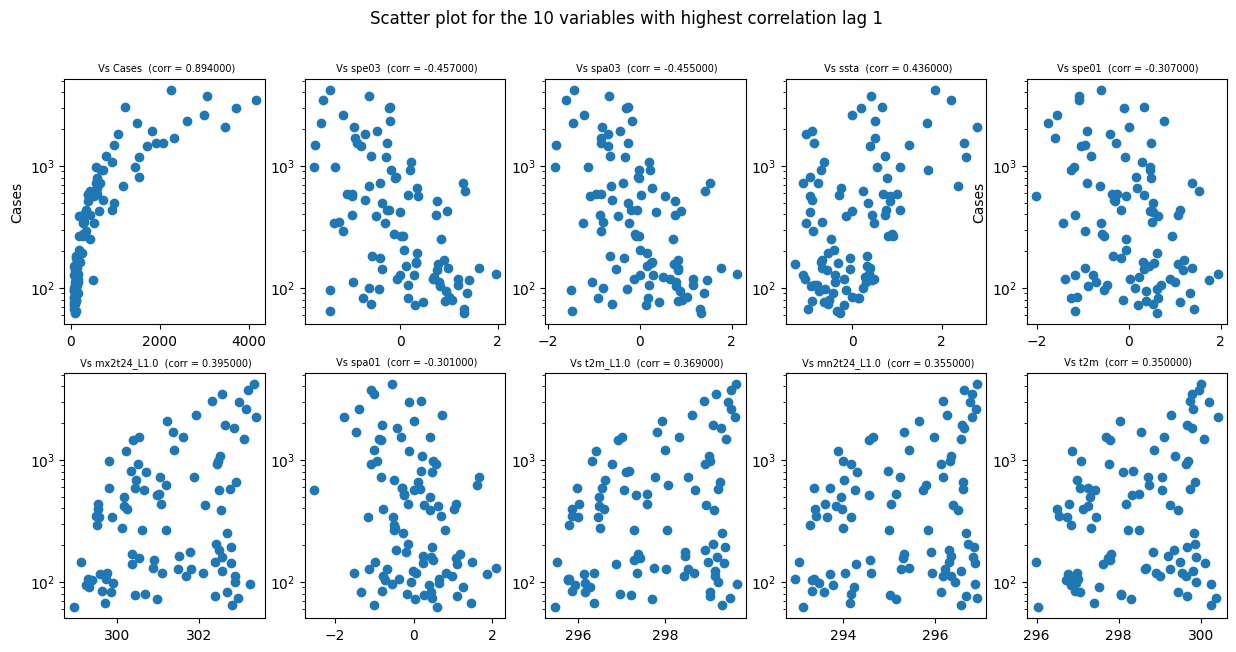

In [49]:
vars=test.index.values.tolist()
plt.figure(figsize=(15,7))
lag= int(str(test.columns.values[0])[4]) #get the lag of the data
contador=0
plt.suptitle("Scatter plot for the 10 variables with highest correlation lag %i" %lag)
for var in vars:
  incidence=data.Cases.values[lag:]
  variable=data["%s"%var].values[0:-lag]
  r2=round(np.corrcoef(incidence,variable)[0,1],3)
  plt.subplot(2,5,contador+1)
  plt.scatter(variable,incidence)
  plt.yscale("log")
  contador+=1
  plt.title(" Vs %s  (corr = %f)" %(var,r2),fontsize=7)



plt.subplot(2,5,1)
plt.ylabel("Cases")
plt.subplot(2,5,int(contador/2))
plt.ylabel("Cases")
#plt.suptitle("lag_%i" %lag)
plt.savefig("Climate_covs_lag_%i.jpg" %lag)

